# Machine Learning Project: MaxTemp Prediction

## Project Overview:
In this project, we aim to predict the **Maximum Temperature (MaxTemp)** based on various meteorological features, such as **Precipitation (Precip)**, **Mean Temperature (MeanTemp)**, **Snowfall**, and other related variables. The dataset used contains weather-related data, and the goal is to use regression models to predict the maximum temperature for each day.

## Objective:
- **Goal:** Build a regression model to predict **MaxTemp** using various weather features.
- **Approach:** The project involves loading the dataset, exploring and preprocessing the data, performing feature engineering, and training a regression model. The final step will be evaluating the model using performance metrics like Mean Squared Error (MSE) and R-squared.

## Steps in this Notebook:
1. **Data Exploration and Preprocessing:**
   - Load the dataset and examine its structure.
   - Handle missing values and outliers.
   - Drop irrelevant features and handle categorical variables.
   
2. **Feature Engineering:**
   - Identify relevant features for predicting MaxTemp.
   - Correlate features with the target variable and visualize them.
   
3. **Model Training and Evaluation:**
   - Split the dataset into training and testing sets.
   - Train a Linear Regression model.
   - Evaluate model performance using MSE and R-squared.
   
4. **Conclusions:**
   - Summarize the model's performance and suggest potential improvements.

## Dataset:
The dataset contains several features such as:
- **Precipitation (Precip)**
- **Snowfall (Snowfall)**
- **MaxTemp** (the target variable)
- **Mean Temperature (MeanTemp), MIN, MAX, MEA** and several other meteorological variables.

## Data Exploration:
We start by loading the data and exploring its structure. This includes checking the size of the dataset and handling any missing values or outliers. We also perform feature selection to identify the most relevant features for predicting **MaxTemp**.


In [1]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


C:\Users\Aftab\AppData\Local\Temp\ipykernel_16100\320349976.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Cell 2: Load the dataset
df = pd.read_csv('ww-ii-data.csv')


C:\Users\Aftab\AppData\Local\Temp\ipykernel_16100\1997247552.py:2: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ww-ii-data.csv')


In [3]:
# Cell 3: Data Exploration - Basic Information
rows, columns = df.shape
print(f"تعداد سطرها: {rows}")
print(f"تعداد ستون‌ها: {columns}")
df.info()


تعداد سطرها: 119040
تعداد ستون‌ها: 31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null 

In [4]:
# Cell 4: Check for missing values
df.isnull().sum()


STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [5]:
# Cell 5: Drop unnecessary columns
columns_to_drop = ["FT", "FB", "FTI", "ITH", "SD3", "RHX", "RHN", "RVG", "WTE"]
df = df.drop(columns=columns_to_drop)


In [6]:
# Cell 6: Handle missing or incorrect values in 'Precip' column
df['Precip'].unique()  # Checking unique values in 'Precip'
df["Precip"].apply(lambda x: x == "T" or x == "Nan").sum()  # Checking for 'T' or 'Nan' values
df['Precip'] = df['Precip'].replace('T', '0')  # Replacing 'T' with 0
df['Precip'] = pd.to_numeric(df['Precip'], errors='coerce')  # Converting 'Precip' to numeric


In [7]:
# Cell 7: Drop 'STA' column because it is highly correlated with 'MaxTemp'
correlation = df[['STA', 'MaxTemp']].corr()  # Checking correlation between 'STA' and 'MaxTemp'
df = df.drop(columns=['STA'])  # Dropping the 'STA' column


In [8]:
# Cell 8: Drop date-related columns since they aren't relevant to the prediction task
columns_to_drop = ['YR', 'MO', 'DA']
df = df.drop(columns=columns_to_drop)


In [9]:
# Cell 9: Handle missing values in 'Snowfall' and 'PRCP' columns
df['Snowfall'] = df['Snowfall'].replace('#VALUE!', np.nan)  # Replacing '#VALUE!' with NaN
df = df.dropna(subset=['Snowfall'])  # Dropping rows with NaN in 'Snowfall'
df['PRCP'] = df['PRCP'].replace('T', '0')  # Replacing 'T' with 0
df = df.dropna(subset=['PRCP'])  # Dropping rows with NaN in 'PRCP'


In [10]:
# Cell 10: Drop columns that are no longer necessary for the analysis
df = df.drop(columns=['PoorWeather', 'TSHDSBRSGF', 'Date', 'DR', 'SPD', 'WindGustSpd', 'SND', 'PGT'])


In [24]:
# Cell 11: Handle missing values in 'MAX' and 'MIN' columns by filling with the median value
df['MAX'].fillna(df['MAX'].median(), inplace=True)  # Filling missing 'MAX' with median value
df['MIN'].fillna(df['MIN'].median(), inplace=True)  # Filling missing 'MIN' with median value
df['MEA'].fillna(df['MEA'].median(), inplace=True)

C:\Users\Aftab\AppData\Local\Temp\ipykernel_16100\1791077279.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MAX'].fillna(df['MAX'].median(), inplace=True)  # Filling missing 'MAX' with median value
C:\Users\Aftab\AppData\Local\Temp\ipykernel_16100\1791077279.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

In [25]:
# Cell 12: Data visualization - Display correlation matrix using a heatmap
correlation = df[["Precip", "MinTemp", "MeanTemp", "Snowfall", "MAX", "MIN", "MEA", "SNF", "MaxTemp"]].corr()
styled_correlation = correlation.style.background_gradient(cmap='coolwarm').format(precision=2)  # Styling the correlation matrix
display(styled_correlation)  # Display the styled correlation matrix


,Precip,MinTemp,MeanTemp,Snowfall,MAX,MIN,MEA,SNF,MaxTemp
Precip,1.00,0.09,0.04,-0.01,-0.00,0.09,0.05,-0.01,-0.00
MinTemp,0.09,1.00,0.96,-0.32,0.83,0.95,0.92,-0.32,0.87
MeanTemp,0.04,0.96,1.00,-0.34,0.91,0.91,0.94,-0.34,0.97
Snowfall,-0.01,-0.32,-0.34,1.00,-0.36,-0.34,-0.36,1.00,-0.34
MAX,-0.00,0.83,0.91,-0.36,1.00,0.86,0.97,-0.36,0.94
MIN,0.09,0.95,0.91,-0.34,0.86,1.00,0.96,-0.34,0.81
MEA,0.05,0.92,0.94,-0.36,0.97,0.96,1.00,-0.36,0.90
SNF,-0.01,-0.32,-0.34,1.00,-0.36,-0.34,-0.36,1.00,-0.34
MaxTemp,-0.00,0.87,0.97,-0.34,0.94,0.81,0.90,-0.34,1.00


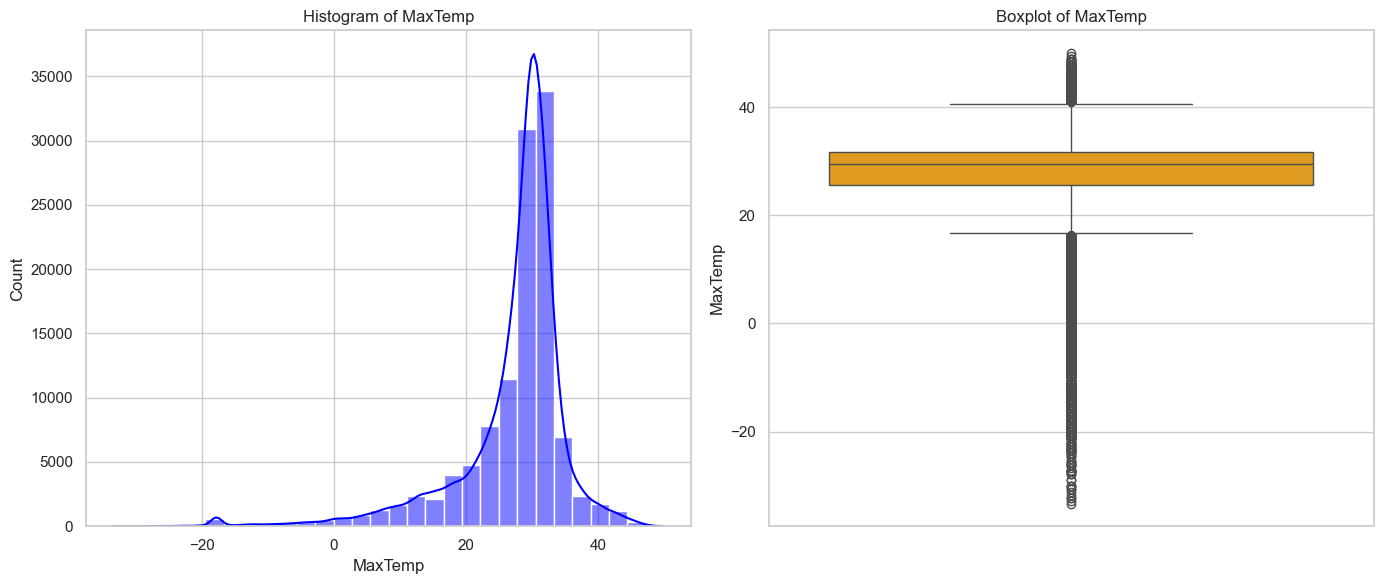

In [26]:
# Cell 13: Plot histograms and boxplots for 'MaxTemp' to understand its distribution
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Creating subplots
sns.histplot(df["MaxTemp"], bins=30, kde=True, ax=axes[0], color='blue')  # Histogram
axes[0].set_title("Histogram of MaxTemp")

sns.boxplot(y="MaxTemp", data=df, ax=axes[1], color='orange')  # Boxplot
axes[1].set_title("Boxplot of MaxTemp")
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


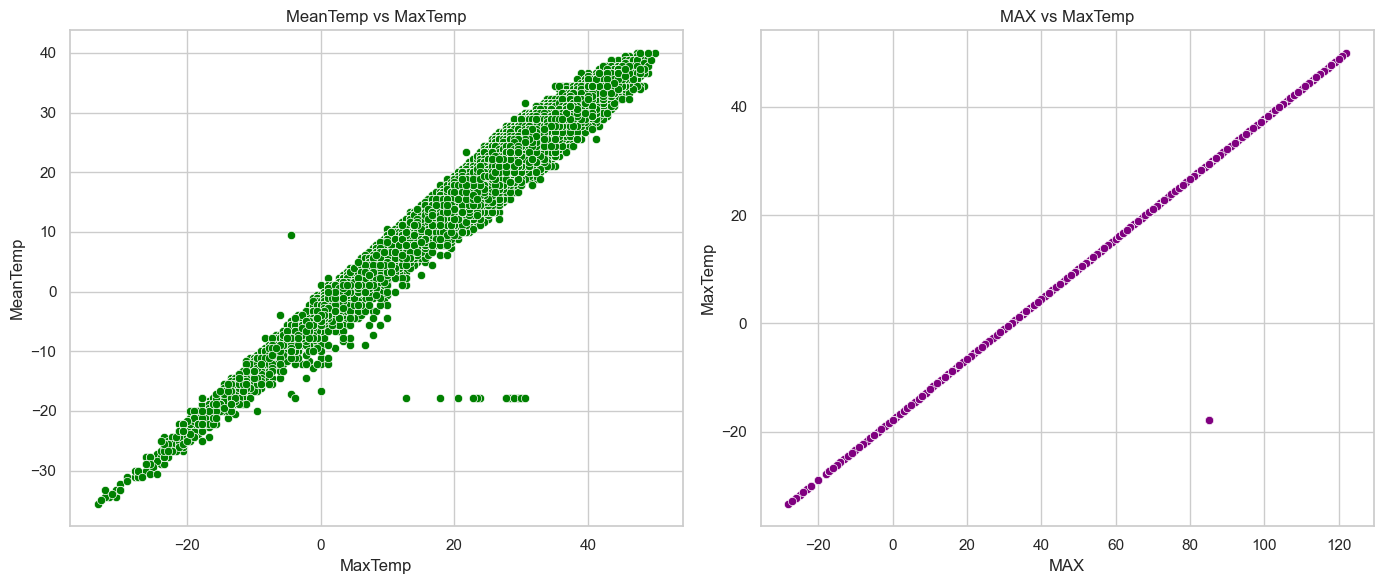

In [27]:
# Cell 14: Scatterplots to explore relationships between temperature columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.scatterplot(x="MaxTemp", y="MeanTemp", data=df, ax=axes[0], color='green')  # Scatterplot between 'MaxTemp' and 'MeanTemp'
axes[0].set_title('MeanTemp vs MaxTemp')

sns.scatterplot(x='MAX', y="MaxTemp", data=df, ax=axes[1], color='purple')  # Scatterplot between 'MAX' and 'MaxTemp'
axes[1].set_title('MAX vs MaxTemp')
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


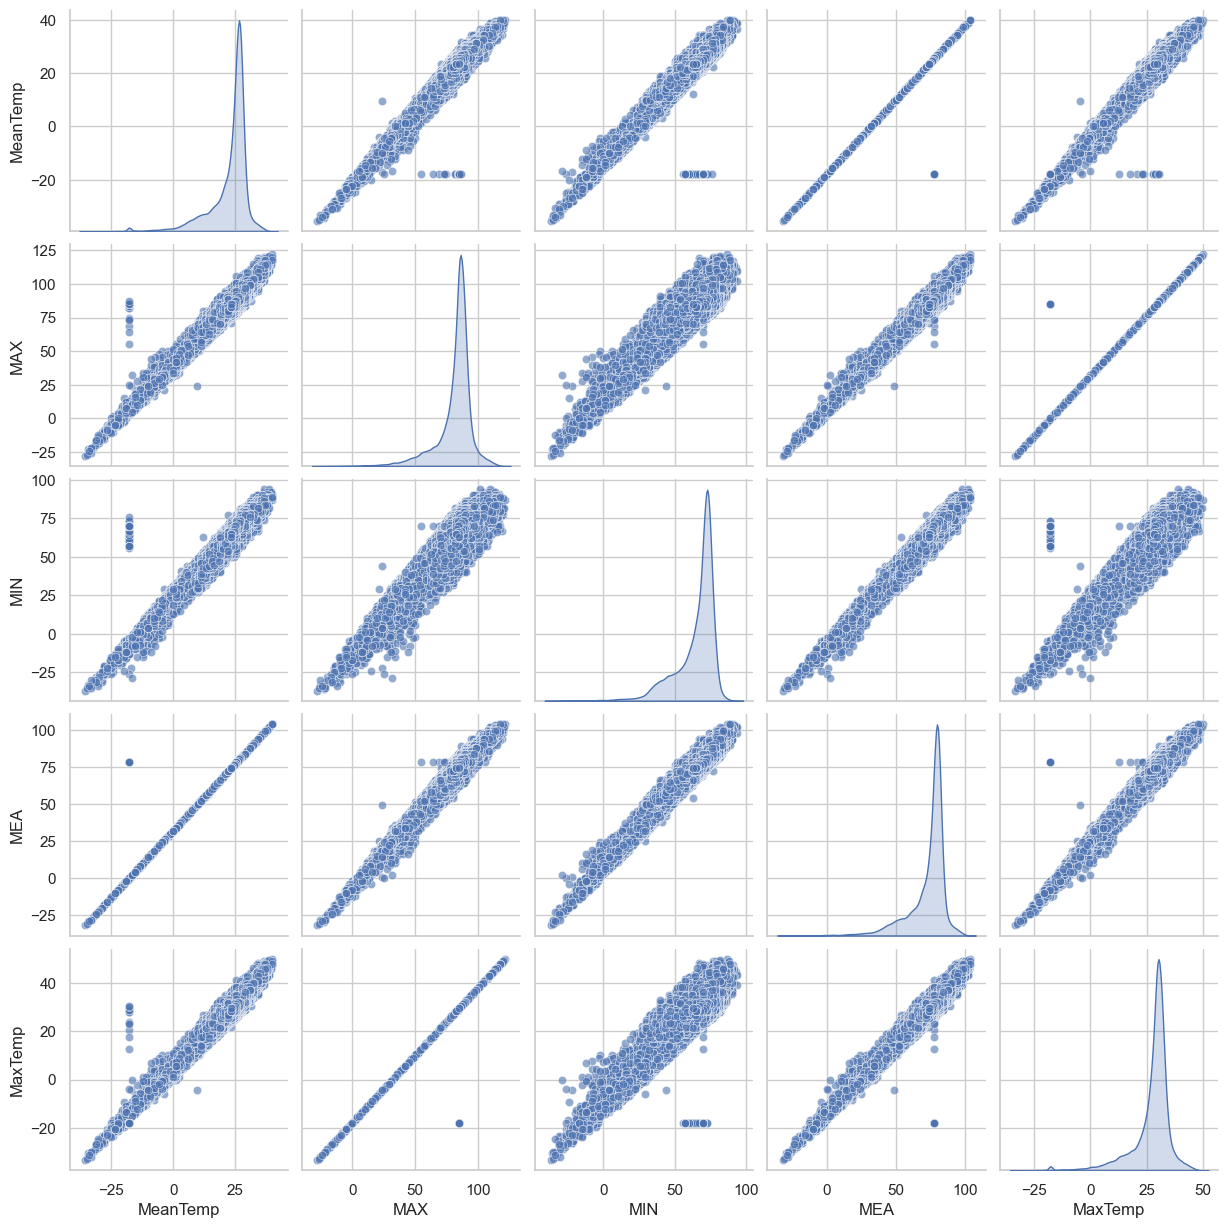

In [28]:
# Cell 15: Pairplot to visualize correlations between multiple variables at once
selected_features = ['MeanTemp', 'MAX', 'MIN', 'MEA', 'MaxTemp']
sns.pairplot(df[selected_features], diag_kind='kde', plot_kws={'alpha': 0.6})  # Pairplot with KDE on diagonal
plt.show()


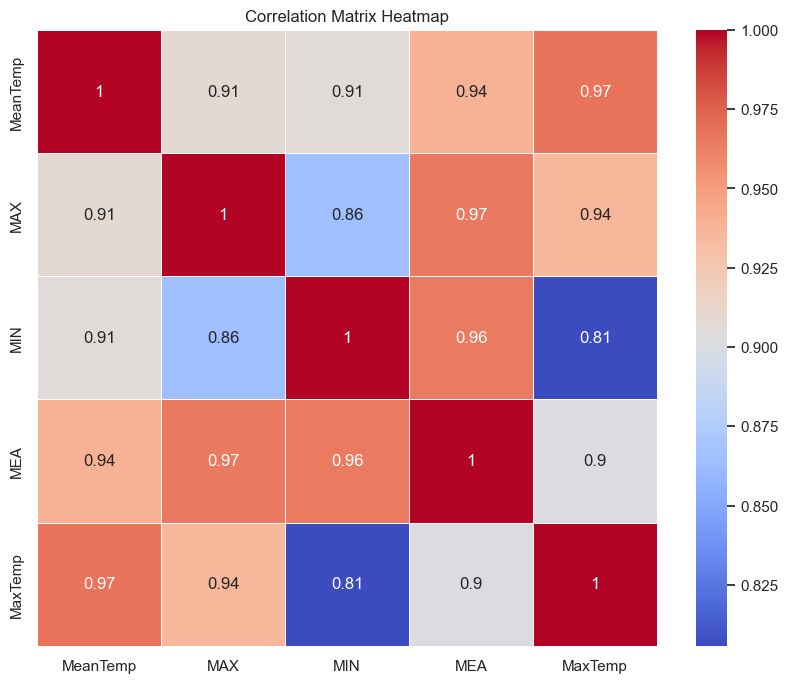

In [29]:
# Cell 16: Correlation matrix heatmap for selected features
correlation_matrix = df[['MeanTemp', 'MAX', 'MIN', 'MEA', 'MaxTemp']].corr()  # Correlation matrix for selected features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)  # Heatmap of the correlation matrix
plt.title('Correlation Matrix Heatmap')
plt.show()


In [30]:
X=df[["MeanTemp",'MEA','MAX']]
y=df['MaxTemp']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=LinearRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.279046147659524
R-squared: 0.9961474426629434
